In [ ]:
!pip install gensim
!pip install konlpy
!pip install JPype1-1.0.1-cp37-cp37m-win_amd64.whl
!pip install pandas_profiling
!pip install kss

In [1]:
import nltk
import sys
import pandas as pd
import pandas_profiling
data = pd.read_csv('spam.csv',encoding='latin1')

In [2]:
data.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
pr = data.profile_report()

In [5]:
pr.to_file('./pr_report.html')

In [7]:
from nltk.tokenize import word_tokenize

In [11]:
print(word_tokenize("Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop."))
# word_tokenize는 Don't를 Do와 n't로 분리하였으며, 반면 Jone's는 Jone과 's로 분리한 것을 확인

['Do', "n't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', ',', 'Mr.', 'Jone', "'s", 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop', '.']


In [12]:
# Jone's를 Jone과 '와 s
from nltk.tokenize import WordPunctTokenizer  
print(WordPunctTokenizer().tokenize("Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop."))

['Don', "'", 't', 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', ',', 'Mr', '.', 'Jone', "'", 's', 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop', '.']


In [13]:
# 케라스의 text_to_word_sequence는 기본적으로 모든 알파벳을 소문자로 바꾸면서 온점이나 컴마, 느낌표 등의 구두점을 제거
from tensorflow.keras.preprocessing.text import text_to_word_sequence
print(text_to_word_sequence("Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop."))

["don't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', 'mr', "jone's", 'orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop']


In [15]:
# home-based는 하나의 토큰으로 취급하고 있으며, dosen't의 경우 does와 n't는 분리
from nltk.tokenize import TreebankWordTokenizer
tokenizer=TreebankWordTokenizer()
text="Starting a home-based restaurant may be an ideal. it doesn't have a food chain or restaurant of their own."
print(tokenizer.tokenize(text))

['Starting', 'a', 'home-based', 'restaurant', 'may', 'be', 'an', 'ideal.', 'it', 'does', "n't", 'have', 'a', 'food', 'chain', 'or', 'restaurant', 'of', 'their', 'own', '.']


In [17]:
from nltk.tokenize import sent_tokenize
text="His barber kept his word. But keeping such a huge secret to himself was driving him crazy. Finally, the barber went up a mountain and almost to the edge of a cliff. He dug a hole in the midst of some reeds. He looked about, to mae sure no one was near."
print(sent_tokenize(text))
text1="I am actively looking for Ph.D. students. and you are a Ph.D student."
print(sent_tokenize(text1))

['His barber kept his word.', 'But keeping such a huge secret to himself was driving him crazy.', 'Finally, the barber went up a mountain and almost to the edge of a cliff.', 'He dug a hole in the midst of some reeds.', 'He looked about, to mae sure no one was near.']
['I am actively looking for Ph.D. students.', 'and you are a Ph.D student.']


In [21]:
# morphs : 형태소 추출
from konlpy.tag import Okt  
okt=Okt()  
print(okt.morphs("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))

['열심히', '코딩', '한', '당신', ',', '연휴', '에는', '여행', '을', '가봐요']


In [24]:
# pos : 품사 태깅(Part-of-speech tagging)
print(okt.pos("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))  
print(okt.nouns("열심히 코딩한 당신, 연휴에는 여행을 가봐요")) 

[('열심히', 'Adverb'), ('코딩', 'Noun'), ('한', 'Josa'), ('당신', 'Noun'), (',', 'Punctuation'), ('연휴', 'Noun'), ('에는', 'Josa'), ('여행', 'Noun'), ('을', 'Josa'), ('가봐요', 'Verb')]
['코딩', '당신', '연휴', '여행']


In [33]:
# 꼬꼬마 형태소 분석기
from konlpy.tag import Kkma  
kkma=Kkma()  
print(kkma.morphs("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))

['열심히', '코딩', '하', 'ㄴ', '당신', ',', '연휴', '에', '는', '여행', '을', '가보', '아요']


In [26]:
print(kkma.pos("열심히 코딩한 당신, 연휴에는 여행을 가봐요")) 

[('열심히', 'MAG'), ('코딩', 'NNG'), ('하', 'XSV'), ('ㄴ', 'ETD'), ('당신', 'NP'), (',', 'SP'), ('연휴', 'NNG'), ('에', 'JKM'), ('는', 'JX'), ('여행', 'NNG'), ('을', 'JKO'), ('가보', 'VV'), ('아요', 'EFN')]


In [34]:
#명사만 출력
print(kkma.nouns("열심히 코딩한 당신, 연휴에는 여행을 가봐요")) 

['코딩', '당신', '연휴', '여행']


In [27]:
# 정규표현식으로 1자리 2자리 글자 제외
import re
text = "I was wondering if anyone out there could enlighten me on this car."
shortword = re.compile(r'\W*\b\w{1,2}\b')
print(shortword.sub('', text))

 was wondering anyone out there could enlighten this car.


In [35]:
# 표제어 원형으로 만든다.
from nltk.stem import WordNetLemmatizer
n=WordNetLemmatizer()
words=['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']
print([n.lemmatize(w) for w in words])# lemmatizer 표제어 추출기

['policy', 'doing', 'organization', 'have', 'going', 'love', 'life', 'fly', 'dy', 'watched', 'ha', 'starting']


In [38]:
# 동사란 것을 따로 추출할 수도 있다.
n.lemmatize('dies', 'v')
n.lemmatize('watched', 'v')
n.lemmatize('has', 'v')

'have'

In [39]:
# 어간 추출 알고리즘 중 하나인 포터 알고리즘(Porter Algorithm)
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
s = PorterStemmer()
text="This was not the map we found in Billy Bones's chest, but an accurate copy, complete in all things--names and heights and soundings--with the single exception of the red crosses and the written notes."
words=word_tokenize(text)
print(words)

['This', 'was', 'not', 'the', 'map', 'we', 'found', 'in', 'Billy', 'Bones', "'s", 'chest', ',', 'but', 'an', 'accurate', 'copy', ',', 'complete', 'in', 'all', 'things', '--', 'names', 'and', 'heights', 'and', 'soundings', '--', 'with', 'the', 'single', 'exception', 'of', 'the', 'red', 'crosses', 'and', 'the', 'written', 'notes', '.']


In [40]:
print([s.stem(w) for w in words])

['thi', 'wa', 'not', 'the', 'map', 'we', 'found', 'in', 'billi', 'bone', "'s", 'chest', ',', 'but', 'an', 'accur', 'copi', ',', 'complet', 'in', 'all', 'thing', '--', 'name', 'and', 'height', 'and', 'sound', '--', 'with', 'the', 'singl', 'except', 'of', 'the', 'red', 'cross', 'and', 'the', 'written', 'note', '.']


In [41]:
words=['formalize', 'allowance', 'electricical']
print([s.stem(w) for w in words])

['formal', 'allow', 'electric']


In [42]:
from nltk.stem import PorterStemmer
s=PorterStemmer()
words=['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']
print([s.stem(w) for w in words])

['polici', 'do', 'organ', 'have', 'go', 'love', 'live', 'fli', 'die', 'watch', 'ha', 'start']


In [43]:
from nltk.stem import LancasterStemmer
l=LancasterStemmer()
words=['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']
print([l.stem(w) for w in words])

['policy', 'doing', 'org', 'hav', 'going', 'lov', 'liv', 'fly', 'die', 'watch', 'has', 'start']


In [51]:
from nltk.corpus import stopwords  
stopwords.words('english')[:5]  

['i', 'me', 'my', 'myself', 'we']

In [48]:
# 불용어 제거하기
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

example = "Family is not an important thing. It's everything."
stop_words = set(stopwords.words('english')) 

word_tokens = word_tokenize(example)

result = []
for w in word_tokens: 
    if w not in stop_words: 
        result.append(w) 

print(word_tokens) 
print(result) 

['Family', 'is', 'not', 'an', 'important', 'thing', '.', 'It', "'s", 'everything', '.']
['Family', 'important', 'thing', '.', 'It', "'s", 'everything', '.']


In [52]:
# 한국어에서 불용어 제거하기
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

example = "고기를 아무렇게나 구우려고 하면 안 돼. 고기라고 다 같은 게 아니거든. 예컨대 삼겹살을 구울 때는 중요한 게 있지."
stop_words = "아무거나 아무렇게나 어찌하든지 같다 비슷하다 예컨대 이럴정도로 하면 아니거든"
# 위의 불용어는 명사가 아닌 단어 중에서 저자가 임의로 선정한 것으로 실제 의미있는 선정 기준이 아님
stop_words=stop_words.split(' ')
word_tokens = word_tokenize(example)

result = [] 
for w in word_tokens: 
    if w not in stop_words: 
        result.append(w) 
# 위의 4줄은 아래의 한 줄로 대체 가능
# result=[word for word in word_tokens if not word in stop_words]

print(word_tokens) 
print(result)

['고기를', '아무렇게나', '구우려고', '하면', '안', '돼', '.', '고기라고', '다', '같은', '게', '아니거든', '.', '예컨대', '삼겹살을', '구울', '때는', '중요한', '게', '있지', '.']
['고기를', '구우려고', '안', '돼', '.', '고기라고', '다', '같은', '게', '.', '삼겹살을', '구울', '때는', '중요한', '게', '있지', '.']


In [53]:
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [58]:
text = "A barber is a person. a barber is good person. a barber is huge person. he Knew A Secret! The Secret He Kept is huge secret. Huge secret. His barber kept his word. a barber kept his word. His barber kept his secret. But keeping and keeping such a huge secret to himself was driving the barber crazy. the barber went up a huge mountain."

In [60]:
text = sent_tokenize(text)
print(text)

['A barber is a person.', 'a barber is good person.', 'a barber is huge person.', 'he Knew A Secret!', 'The Secret He Kept is huge secret.', 'Huge secret.', 'His barber kept his word.', 'a barber kept his word.', 'His barber kept his secret.', 'But keeping and keeping such a huge secret to himself was driving the barber crazy.', 'the barber went up a huge mountain.']


In [56]:
vocab = {} # 파이썬의 dictionary 자료형
sentences = []
stop_words = set(stopwords.words('english'))

for i in text:
    sentence = word_tokenize(i) # 단어 토큰화를 수행합니다.
    result = []

    for word in sentence: 
        word = word.lower() # 모든 단어를 소문자화하여 단어의 개수를 줄입니다.
        if word not in stop_words: # 단어 토큰화 된 결과에 대해서 불용어를 제거합니다.
            if len(word) > 2: # 단어 길이가 2이하인 경우에 대하여 추가로 단어를 제거합니다.
                result.append(word)
                if word not in vocab:
                    vocab[word] = 0 
                vocab[word] += 1
    sentences.append(result) 
print(sentences)

[['barber', 'person'], ['barber', 'good', 'person'], ['barber', 'huge', 'person'], ['knew', 'secret'], ['secret', 'kept', 'huge', 'secret'], ['huge', 'secret'], ['barber', 'kept', 'word'], ['barber', 'kept', 'word'], ['barber', 'kept', 'secret'], ['keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy'], ['barber', 'went', 'huge', 'mountain']]


In [78]:
print(vocab)

{'barber': 8, 'person': 3, 'good': 1, 'huge': 5, 'knew': 1, 'secret': 6, 'kept': 4, 'word': 2, 'keeping': 2, 'driving': 1, 'crazy': 1, 'went': 1, 'mountain': 1}


In [79]:
vocab_sorted = sorted(vocab.items(), key = lambda x:x[1], reverse = True)
print(vocab_sorted)

[('barber', 8), ('secret', 6), ('huge', 5), ('kept', 4), ('person', 3), ('word', 2), ('keeping', 2), ('good', 1), ('knew', 1), ('driving', 1), ('crazy', 1), ('went', 1), ('mountain', 1)]


In [80]:
word_to_index = {}
i=0
for (word, frequency) in vocab_sorted :
    if frequency > 1 : # 정제(Cleaning) 챕터에서 언급했듯이 빈도수가 적은 단어는 제외한다.
        i=i+1
        word_to_index[word] = i
print(word_to_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5, 'word': 6, 'keeping': 7}


In [82]:
vocab_size = 5
words_frequency = [w for w,c in word_to_index.items() if c >= vocab_size + 1] # 인덱스가 5 초과인 단어 제거
for w in words_frequency:
    del word_to_index[w] # 해당 단어에 대한 인덱스 정보를 삭제
print(word_to_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5}


In [83]:
word_to_index['OOV'] = len(word_to_index) + 1

In [87]:
encoded = []
for s in sentences:
    temp = []
    for w in s:
        try:
            temp.append(word_to_index[w])
        except KeyError:
            temp.append(word_to_index['OOV'])
    encoded.append(temp)
print(encoded)

[[1, 5], [1, 6, 5], [1, 3, 5], [6, 2], [2, 4, 3, 2], [3, 2], [1, 4, 6], [1, 4, 6], [1, 4, 2], [6, 6, 3, 2, 6, 1, 6], [1, 6, 3, 6]]


[['barber', 'person'],
 ['barber', 'good', 'person'],
 ['barber', 'huge', 'person'],
 ['knew', 'secret'],
 ['secret', 'kept', 'huge', 'secret'],
 ['huge', 'secret'],
 ['barber', 'kept', 'word'],
 ['barber', 'kept', 'word'],
 ['barber', 'kept', 'secret'],
 ['keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy'],
 ['barber', 'went', 'huge', 'mountain']]

In [86]:
word_to_index

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5, 'OOV': 6}

In [88]:
from collections import Counter

In [89]:
print(sentences)

[['barber', 'person'], ['barber', 'good', 'person'], ['barber', 'huge', 'person'], ['knew', 'secret'], ['secret', 'kept', 'huge', 'secret'], ['huge', 'secret'], ['barber', 'kept', 'word'], ['barber', 'kept', 'word'], ['barber', 'kept', 'secret'], ['keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy'], ['barber', 'went', 'huge', 'mountain']]


In [98]:
words = sum(sentences, [])
# 위 작업은 words = np.hstack(sentences)로도 수행 가능.
print(words)
vocab = Counter(words) # 파이썬의 Counter 모듈을 이용하면 단어의 모든 빈도를 쉽게 계산할 수 있습니다.
print(vocab)

['barber', 'person', 'barber', 'good', 'person', 'barber', 'huge', 'person', 'knew', 'secret', 'secret', 'kept', 'huge', 'secret', 'huge', 'secret', 'barber', 'kept', 'word', 'barber', 'kept', 'word', 'barber', 'kept', 'secret', 'keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy', 'barber', 'went', 'huge', 'mountain']
Counter({'barber': 8, 'secret': 6, 'huge': 5, 'kept': 4, 'person': 3, 'word': 2, 'keeping': 2, 'good': 1, 'knew': 1, 'driving': 1, 'crazy': 1, 'went': 1, 'mountain': 1})


In [99]:
print(vocab["barber"])

8


In [100]:
vocab_size = 5
vocab = vocab.most_common(vocab_size) # 등장 빈도수가 높은 상위 5개의 단어만 저장
vocab

[('barber', 8), ('secret', 6), ('huge', 5), ('kept', 4), ('person', 3)]

In [101]:
word_to_index = {}
i = 0
for (word, frequency) in vocab :
    i = i+1
    word_to_index[word] = i
print(word_to_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5}


In [102]:
from nltk import FreqDist
import numpy as np

In [103]:
# np.hstack으로 문장 구분을 제거하여 입력으로 사용 . ex) ['barber', 'person', 'barber', 'good' ... 중략 ...
vocab = FreqDist(np.hstack(sentences))

In [107]:
vocab_size = 5
vocab = vocab.most_common(vocab_size) # 등장 빈도수가 높은 상위 5개의 단어만 저장
vocab

[('barber', 8), ('secret', 6), ('huge', 5), ('kept', 4), ('person', 3)]

In [109]:
word_to_index = {word[0] : index + 1 for index, word in enumerate(vocab)}
print(word_to_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5}


In [113]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)

In [114]:
print(tokenizer.word_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5, 'word': 6, 'keeping': 7, 'good': 8, 'knew': 9, 'driving': 10, 'crazy': 11, 'went': 12, 'mountain': 13}


In [116]:
print(tokenizer.word_counts)
print(tokenizer.texts_to_sequences(sentences))

OrderedDict([('barber', 8), ('person', 3), ('good', 1), ('huge', 5), ('knew', 1), ('secret', 6), ('kept', 4), ('word', 2), ('keeping', 2), ('driving', 1), ('crazy', 1), ('went', 1), ('mountain', 1)])
[[1, 5], [1, 8, 5], [1, 3, 5], [9, 2], [2, 4, 3, 2], [3, 2], [1, 4, 6], [1, 4, 6], [1, 4, 2], [7, 7, 3, 2, 10, 1, 11], [1, 12, 3, 13]]


In [117]:
vocab_size = 5
tokenizer = Tokenizer(num_words = vocab_size + 1) # 상위 5개 단어만 사용
tokenizer.fit_on_texts(sentences)

In [118]:
print(tokenizer.word_index)
print(tokenizer.word_counts)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5, 'word': 6, 'keeping': 7, 'good': 8, 'knew': 9, 'driving': 10, 'crazy': 11, 'went': 12, 'mountain': 13}


In [120]:
# 실제 적용은 tokenizer.texts_to_sequences(sentences)로 적용
print(tokenizer.texts_to_sequences(sentences))

[[1, 5], [1, 5], [1, 3, 5], [2], [2, 4, 3, 2], [3, 2], [1, 4], [1, 4], [1, 4, 2], [3, 2, 1], [1, 3]]


In [121]:
# 만약 word_index와 word_counts에서도 지정된 num_words만큼의 단어만 남기고 싶다면
tokenizer = Tokenizer() # num_words를 여기서는 지정하지 않은 상태
tokenizer.fit_on_texts(sentences)

In [122]:
vocab_size = 5
words_frequency = [w for w,c in tokenizer.word_index.items() if c >= vocab_size + 1] # 인덱스가 5 초과인 단어 제거
for w in words_frequency:
    del tokenizer.word_index[w] # 해당 단어에 대한 인덱스 정보를 삭제
    del tokenizer.word_counts[w] # 해당 단어에 대한 카운트 정보를 삭제
print(tokenizer.word_index)
print(tokenizer.word_counts)
print(tokenizer.texts_to_sequences(sentences))

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5}
OrderedDict([('barber', 8), ('person', 3), ('huge', 5), ('secret', 6), ('kept', 4)])
[[1, 5], [1, 5], [1, 3, 5], [2], [2, 4, 3, 2], [3, 2], [1, 4], [1, 4], [1, 4, 2], [3, 2, 1], [1, 3]]


In [124]:
vocab_size = 5
tokenizer = Tokenizer(num_words = vocab_size + 2, oov_token = 'OOV')
# 빈도수 상위 5개 단어만 사용. 숫자 0과 OOV를 고려해서 단어 집합의 크기는 +2
tokenizer.fit_on_texts(sentences)

In [127]:
print('단어 OOV의 인덱스 : {}'.format(tokenizer.word_index['OOV']))
print(tokenizer.texts_to_sequences(sentences))

단어 OOV의 인덱스 : 1
[[2, 6], [2, 1, 6], [2, 4, 6], [1, 3], [3, 5, 4, 3], [4, 3], [2, 5, 1], [2, 5, 1], [2, 5, 3], [1, 1, 4, 3, 1, 2, 1], [2, 1, 4, 1]]


In [128]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer

In [129]:
sentences = [['barber', 'person'], ['barber', 'good', 'person'], ['barber', 'huge', 'person'], ['knew', 'secret'], ['secret', 'kept', 'huge', 'secret'], ['huge', 'secret'], ['barber', 'kept', 'word'], ['barber', 'kept', 'word'], ['barber', 'kept', 'secret'], ['keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy'], ['barber', 'went', 'huge', 'mountain']]

In [130]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)

In [131]:
encoded = tokenizer.texts_to_sequences(sentences)
print(encoded)

[[1, 5], [1, 8, 5], [1, 3, 5], [9, 2], [2, 4, 3, 2], [3, 2], [1, 4, 6], [1, 4, 6], [1, 4, 2], [7, 7, 3, 2, 10, 1, 11], [1, 12, 3, 13]]


In [132]:
max_len = max(len(item) for item in encoded)
print(max_len)

7


In [133]:
for item in encoded: # 각 문장에 대해서
    while len(item) < max_len:   # max_len보다 작으면
        item.append(0)

padded_np = np.array(encoded)
padded_np

array([[ 1,  5,  0,  0,  0,  0,  0],
       [ 1,  8,  5,  0,  0,  0,  0],
       [ 1,  3,  5,  0,  0,  0,  0],
       [ 9,  2,  0,  0,  0,  0,  0],
       [ 2,  4,  3,  2,  0,  0,  0],
       [ 3,  2,  0,  0,  0,  0,  0],
       [ 1,  4,  6,  0,  0,  0,  0],
       [ 1,  4,  6,  0,  0,  0,  0],
       [ 1,  4,  2,  0,  0,  0,  0],
       [ 7,  7,  3,  2, 10,  1, 11],
       [ 1, 12,  3, 13,  0,  0,  0]])

In [134]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [135]:
encoded = tokenizer.texts_to_sequences(sentences)
print(encoded)

[[1, 5], [1, 8, 5], [1, 3, 5], [9, 2], [2, 4, 3, 2], [3, 2], [1, 4, 6], [1, 4, 6], [1, 4, 2], [7, 7, 3, 2, 10, 1, 11], [1, 12, 3, 13]]


In [136]:
padded = pad_sequences(encoded)
padded

array([[ 0,  0,  0,  0,  0,  1,  5],
       [ 0,  0,  0,  0,  1,  8,  5],
       [ 0,  0,  0,  0,  1,  3,  5],
       [ 0,  0,  0,  0,  0,  9,  2],
       [ 0,  0,  0,  2,  4,  3,  2],
       [ 0,  0,  0,  0,  0,  3,  2],
       [ 0,  0,  0,  0,  1,  4,  6],
       [ 0,  0,  0,  0,  1,  4,  6],
       [ 0,  0,  0,  0,  1,  4,  2],
       [ 7,  7,  3,  2, 10,  1, 11],
       [ 0,  0,  0,  1, 12,  3, 13]])

In [137]:
padded = pad_sequences(encoded, padding = 'post') #  뒤에 0을 채우고 싶다면 인자로 padding='post'
padded

array([[ 1,  5,  0,  0,  0,  0,  0],
       [ 1,  8,  5,  0,  0,  0,  0],
       [ 1,  3,  5,  0,  0,  0,  0],
       [ 9,  2,  0,  0,  0,  0,  0],
       [ 2,  4,  3,  2,  0,  0,  0],
       [ 3,  2,  0,  0,  0,  0,  0],
       [ 1,  4,  6,  0,  0,  0,  0],
       [ 1,  4,  6,  0,  0,  0,  0],
       [ 1,  4,  2,  0,  0,  0,  0],
       [ 7,  7,  3,  2, 10,  1, 11],
       [ 1, 12,  3, 13,  0,  0,  0]])

In [139]:
last_value = len(tokenizer.word_index) + 1 # 단어 집합의 크기보다 1 큰 숫자를 사용
print(last_value)

14


In [140]:
padded = pad_sequences(encoded, padding = 'post', value = last_value)
padded

array([[ 1,  5, 14, 14, 14, 14, 14],
       [ 1,  8,  5, 14, 14, 14, 14],
       [ 1,  3,  5, 14, 14, 14, 14],
       [ 9,  2, 14, 14, 14, 14, 14],
       [ 2,  4,  3,  2, 14, 14, 14],
       [ 3,  2, 14, 14, 14, 14, 14],
       [ 1,  4,  6, 14, 14, 14, 14],
       [ 1,  4,  6, 14, 14, 14, 14],
       [ 1,  4,  2, 14, 14, 14, 14],
       [ 7,  7,  3,  2, 10,  1, 11],
       [ 1, 12,  3, 13, 14, 14, 14]])

In [141]:
from konlpy.tag import Okt  
okt=Okt()  
token=okt.morphs("나는 자연어 처리를 배운다")  
print(token)

['나', '는', '자연어', '처리', '를', '배운다']


In [145]:
word2index={}
for voca in token:
     if voca not in word2index.keys():
        word2index[voca]=len(word2index)
        print(word2index)
print(word2index)

{'나': 0}
{'나': 0, '는': 1}
{'나': 0, '는': 1, '자연어': 2}
{'나': 0, '는': 1, '자연어': 2, '처리': 3}
{'나': 0, '는': 1, '자연어': 2, '처리': 3, '를': 4}
{'나': 0, '는': 1, '자연어': 2, '처리': 3, '를': 4, '배운다': 5}
{'나': 0, '는': 1, '자연어': 2, '처리': 3, '를': 4, '배운다': 5}


In [148]:
def one_hot_encoding(word, word2index):
    one_hot_vector = [0]*(len(word2index))
    index=word2index[word]
    one_hot_vector[index]=1
    return one_hot_vector
one_hot_encoding('자연어',word2index)

[0, 0, 1, 0, 0, 0]

In [149]:
text="나랑 점심 먹으러 갈래 점심 메뉴는 햄버거 갈래 갈래 햄버거 최고야"

In [150]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

text="나랑 점심 먹으러 갈래 점심 메뉴는 햄버거 갈래 갈래 햄버거 최고야"

t = Tokenizer()
t.fit_on_texts([text])
print(t.word_index)

{'갈래': 1, '점심': 2, '햄버거': 3, '나랑': 4, '먹으러': 5, '메뉴는': 6, '최고야': 7}


In [151]:
sub_text="점심 먹으러 갈래 메뉴는 햄버거 최고야"
encoded=t.texts_to_sequences([sub_text])[0]
print(encoded)

[2, 5, 1, 6, 3, 7]


In [152]:
one_hot = to_categorical(encoded)
print(one_hot)

[[0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]


In [153]:
import pandas as pd

values = [['당신에게 드리는 마지막 혜택!', 1],
['내일 뵐 수 있을지 확인 부탁드...', 0],
['도연씨. 잘 지내시죠? 오랜만입...', 0],
['(광고) AI로 주가를 예측할 수 있다!', 1]]
columns = ['메일 본문', '스팸 메일 유무']

df = pd.DataFrame(values, columns=columns)
df

,메일 본문,스팸 메일 유무
0,당신에게 드리는 마지막 혜택!,1
1,내일 뵐 수 있을지 확인 부탁드...,0
2,도연씨. 잘 지내시죠? 오랜만입...,0
3,(광고) AI로 주가를 예측할 수 있다!,1


In [154]:
X=df['메일 본문']
y=df['스팸 메일 유무']

In [156]:
import numpy as np
ar = np.arange(0,16).reshape((4,4))
print(ar)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


In [157]:
X=ar[:, :3]
print(X)

[[ 0  1  2]
 [ 4  5  6]
 [ 8  9 10]
 [12 13 14]]


In [158]:
y=ar[:,3]
print(y)

[ 3  7 11 15]


In [159]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=1234)

In [160]:
from konlpy.tag import Okt
import re  
okt=Okt()  

token=re.sub("(\.)","","정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다.")  
# 정규 표현식을 통해 온점을 제거하는 정제 작업입니다.  
token=okt.morphs(token)  
token
# OKT 형태소 분석기를 통해 토큰화 작업을 수행한 뒤에, token에다가 넣습니다.  

['정부', '가', '발표', '하는', '물가상승률', '과', '소비자', '가', '느끼는', '물가상승률', '은', '다르다']

In [161]:
word2index={}  
bow=[]  
for voca in token:  
         if voca not in word2index.keys():  
             word2index[voca]=len(word2index)  
# token을 읽으면서, word2index에 없는 (not in) 단어는 새로 추가하고, 이미 있는 단어는 넘깁니다.   
             bow.insert(len(word2index)-1,1)
# BoW 전체에 전부 기본값 1을 넣어줍니다. 단어의 개수는 최소 1개 이상이기 때문입니다.  
         else:
            index=word2index.get(voca)
# 재등장하는 단어의 인덱스를 받아옵니다.
            bow[index]=bow[index]+1
# 재등장한 단어는 해당하는 인덱스의 위치에 1을 더해줍니다. (단어의 개수를 세는 것입니다.)  
print(word2index)  

{'정부': 0, '가': 1, '발표': 2, '하는': 3, '물가상승률': 4, '과': 5, '소비자': 6, '느끼는': 7, '은': 8, '다르다': 9}


In [ ]:
# 영화 분석

In [326]:
import requests
from bs4 import BeautifulSoup
test_url = 'https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=136990&type=after&onlyActualPointYn=Y&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false&page=1'
resp = requests.get(test_url)
html = BeautifulSoup(resp.content, 'html.parser')
score_result = html.find('div', {'class': 'score_result'})
lis = score_result.findAll('li')
lis[0]

<li>
<div class="star_score">
<span class="st_off"><span class="st_on" style="width:100.0%"></span></span><em>10</em>
</div>
<div class="score_reple">
<p>
<span class="ico_viewer">관람객</span>
<!-- 스포일러 컨텐츠로 처리되는지 여부 -->
<span id="_filtered_ment_0">
														
															
															
																내 어릴적 베스트 영화의 속편이 너무 잘만들어져서 울컥했습니다. 
															
														
														
													</span>
</p>
<dl>
<dt>
<em>
<a href="#" onclick="javascript:showPointListByNid(14316715, 'after');parent.clickcr(this, 'ara.uid', '', '', event); return false;" target="_top">
<span>아머두어라두(dkqj****)</span>
</a>
</em>
<em>2018.07.18 18:05</em>
</dt>
<dd>
<a class="go_report2" href="#" onclick="parent.clickcr(this, 'ara.report', '', '', event); common.report('false','dkqj****', 'jYF/eBUJpeGFX5C6uvyB6so2V3wrTMYcBaZVx3qSI4Q=', '내 어릴적 베스트 영화의 속편이 너무 잘만들어져서 울컥했습니다. ', '14316715', 'point_after', false);return false;"><em>신고</em></a>
</dd>
</dl>
</div>
<div class="btn_area">
<a class="_sympathy

In [334]:
contents = lis[0].select('p > span')[1].getText().strip()
contents
# score = lis[0].select('div.star_score > em')[0].getText().strip()

'내 어릴적 베스트 영화의 속편이 너무 잘만들어져서 울컥했습니다.'

In [320]:
nickname = lis[].select('a')[1].find('span').getText().strip()
nickname

'ray0****'

In [348]:
aa = ['https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=185917&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false&page=',
 'https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=185917&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false&page=',
 'https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=93756&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false&page=']
data = []
def movie_score_1():
    data = []
    for i in range(1,500,1):
        test_url = f'https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=136990&type=after&onlyActualPointYn=Y&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false&page={i}'
        resp = requests.get(test_url)
        html = BeautifulSoup(resp.content, 'html.parser')
        score_result = html.find('div', {'class': 'score_result'})
        lis = score_result.findAll('li')
        for lists in lis:
            try:
                try:
                    contents = lists.select('p > span')[1].getText().strip()
                except:
                    contents = lists.select('p > span')[0].getText().strip()
                score = lists.select('div.star_score > em')[0].getText().strip()
                nickname = lists.select('a')[0].find('span').getText().strip()
                data.append([nickname,contents,score])
            except:
                pass
    return data

In [349]:
def movie_score_2():
    data = []
    for i in range(1,1500,1):
        test_url = f'https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=185917&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false&page={i}'
        resp = requests.get(test_url)
        html = BeautifulSoup(resp.content, 'html.parser')
        score_result = html.find('div', {'class': 'score_result'})
        lis = score_result.findAll('li')
        for lists in lis:
            try:
                try:
                    contents = lists.select('p > span')[1].getText().strip()
                except:
                    contents = lists.select('p > span')[0].getText().strip()
                score = lists.select('div.star_score > em')[0].getText().strip()
                nickname = lists.select('a')[0].find('span').getText().strip()
                data.append([nickname,contents,score])
            except:
                pass
    return data

In [350]:
def movie_score_3():
    data = []
    for i in range(1,5000,1):
        test_url = f'https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=93756&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false&page={i}'
        resp = requests.get(test_url)
        html = BeautifulSoup(resp.content, 'html.parser')
        score_result = html.find('div', {'class': 'score_result'})
        lis = score_result.findAll('li')
        for lists in lis:
            try:
                try:
                    contents = lists.select('p > span')[1].getText().strip()
                except:
                    contents = lists.select('p > span')[0].getText().strip()
                score = lists.select('div.star_score > em')[0].getText().strip()
                nickname = lists.select('a')[0].find('span').getText().strip()
                data.append([nickname,contents,score])
            except:
                pass
    return data

In [351]:
a= movie_score_1()
b= movie_score_2()
c= movie_score_3()

In [355]:
abc = pd.DataFrame(a, columns=['아이디','내용','점수'])
abc1= pd.DataFrame(b, columns=['아이디','내용','점수'])
abc2 = pd.DataFrame(c, columns=['아이디','내용','점수'])
df_score = pd.concat([abc,abc1,abc2])
df_score.to_csv('영화평가.csv')

In [14]:
import pandas as pd
import numpy as np

In [44]:
kk = pd.read_csv('영화평가.csv')
kk =kk.iloc[:,1:]
kk = kk.dropna()
kk['점수']= [1 if i>=7 else 0 for i in kk['점수']]
kk['점수']=kk['점수'].astype(str)

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(kk.iloc[:,:3], test_size= 0.2, random_state=1234)

In [47]:
X_train.to_csv('mv_train.csv')
X_test.to_csv('mv_test.csv')

In [54]:
# def read_data(filename):
#     with open(filename, 'r',encoding='utf8') as f:
#         data = [line.split('\t') for line in f.read().splitlines()]
#         data = data[1:]
#     return data
import pandas as pd
import numpy as np
def read_data(filename):
    data = pd.read_csv(filename,dtype=str)
    data = data.iloc[:,1:]
    data1 = [[data.iloc[line][0], data.iloc[line][1],data.loc[line][2]] for line in range(data.shape[0])]
    return data1

    
train_data = read_data('mv_train.csv')
test_data = read_data('mv_test.csv')
display(train_data[:5])
display(test_data[:5])


[['라일락(bitn****)',
  '와눈물흘림.. 이순신장군님 만세!! 영화 정말 올해동안 이런대작 만나기힘들듯해요 모두연기파 배우에 흠잡을게없이 대작이네요 명량 !!!! 1000만돌파하고도 남을 영화 ㅠㅠㅠ한번더보고싶네',
  '1'],
 ['dova****', '재밋다 다음편 한산도 봐야지', '1'],
 ['김윤정(yoon****)', '기대 안했는데 속편도 재밌었어요!', '1'],
 ['ehdq****', '너무 재밌던 영화였음 역시 이순신!', '1'],
 ['시연(kem9****)', '대박대박 진짜어마어마하게 예매하구 자리는구석앉았지만 진짜재미있었ㅈ다!진짜재밌어요 꿀잼 ~~', '1']]

[['ferk****',
  '액션씬이며 배우들의 연기며 스토리며 몰입도며 모두 모두 최고였다~~울트라 한부대로 탱크 30부대를 이긴 장본인',
  '1'],
 ['kors****', '액션신이 돋보이는 영화', '1'],
 ['SN굿보이(dleh****)', '감명^^ 연기력최고 웰메이드영화네요', '1'],
 ['김보미(booh****)', '잘봤어요~ 극장에서꼭!!!보세요', '1'],
 ['IS진우(ijwi****)', '지루해 평점 7점대가 적합해', '0']]

In [49]:
from konlpy.tag import Okt
okt = Okt()


In [50]:
def tokenize(doc):
    # norm은 정규화, stem은 근어로 표시하기를 나타냄
    return ['/'.join(t) for t in okt.pos(doc, norm=True, stem=True)]

In [55]:
import os 
import json
from pprint import pprint
if os.path.isfile('./data/docs_학습용.json'):
    with open('./data/docs_학습용.json',encoding='utf-8') as f:
        train_docs = json.load(f)
    with open('./data/docs_검증용.json',encoding='utf-8') as f:
        test_docs = json.load(f)
else:
    train_docs = [(tokenize(row[1]), row[2]) for row in train_data]
    test_docs = [(tokenize(row[1]), row[2]) for row in test_data]
    # JSON 파일로 저장
    with open('./data/docs_학습용.json', 'w', encoding="utf-8") as make_file:
        json.dump(train_docs, make_file, ensure_ascii=False, indent="\t")
    with open('./data/docs_검증용.json', 'w', encoding="utf-8") as make_file:
        json.dump(test_docs, make_file, ensure_ascii=False, indent="\t")

In [25]:
tokens = [t for d in train_docs for t in d[0]]
import nltk
text = nltk.Text(tokens, name='NMSC')
pprint(text.vocab().most_common(10))

['54661,YOOM2YA(dolk****),오랜만에 울면서 두손잡고 봤네요~,1']

In [ ]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.rcParams['font.family']='NanumGothicCoding'
plt.rcParams['axes.unicode_minus']=False
plt.rcParams['figure.dpi']=200
%matplotlib inline

In [ ]:
plt.figure(figsize=(20,10))
text.plot(50)

In [ ]:
selected_words = [f[0] for f in text.vocab().most_common(10000)]

In [ ]:
def term_frequency(doc):
    return [doc.count(word) for word in selected_words]

In [ ]:
test_x = [term_frequency(d) for d, _ in test_docs]

In [ ]:
train_x = [term_frequency(d) for d, _ in train_docs]
test_x = [term_frequency(d) for d, _ in test_docs]
train_y = [c for _, c in train_docs]
test_y = [c for _, c in test_docs]

In [ ]:
################@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@##############

In [27]:
def read_data(filename):
    with open(filename, 'r',encoding='UTF8') as f:
        data = [line.split('\t') for line in f.read().splitlines()]
        # txt 파일의 헤더(id document label)는 제외하기
        data = data[1:]
    return data

train_data = read_data('./data/ratings_train.txt')
test_data = read_data('./data/ratings_test.txt')
train_data

[['9976970', '아 더빙.. 진짜 짜증나네요 목소리', '0'],
 ['3819312', '흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나', '1'],
 ['10265843', '너무재밓었다그래서보는것을추천한다', '0'],
 ['9045019', '교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정', '0'],
 ['6483659',
  '사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다',
  '1'],
 ['5403919', '막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.', '0'],
 ['7797314', '원작의 긴장감을 제대로 살려내지못했다.', '0'],
 ['9443947',
  '별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단 낫겟다 납치.감금만반복반복..이드라마는 가족도없다 연기못하는사람만모엿네',
  '0'],
 ['7156791', '액션이 없는데도 재미 있는 몇안되는 영화', '1'],
 ['5912145', '왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?', '1'],
 ['9008700', '걍인피니트가짱이다.진짜짱이다♥', '1'],
 ['10217543', '볼때마다 눈물나서 죽겠다90년대의 향수자극!!허진호는 감성절제멜로의 달인이다~', '1'],
 ['5957425', '울면서 손들고 횡단보도 건널때 뛰쳐나올뻔 이범수 연기 드럽게못해', '0'],
 ['8628627', '담백하고 깔끔해서 좋다. 신문기사로만 보다 보면 자꾸 잊어버린다. 그들도 사람이었다는 것을.', '1'],
 ['9864035', '취향은 존중한다지만 진짜 내생에 극장에서 본 영화중 가장 노잼 노감동임 스토리도 어거지고 감동도 어거지', '0'],
 ['6852435', 'ㄱ냥 매번 긴장되고 재밋음ㅠㅠ', '1'],
 ['9143163',
  '참 사람들 웃긴게 

In [49]:
print(len(train_data))
print(len(train_data[0]))
print(len(test_data))
print(len(test_data[0]))

150000
3
50000
3


In [5]:
from konlpy.tag import Okt

okt = Okt()
print(okt.pos(u'이 밤 그날의 반딧불을 당신의 창 가까이 보낼게요'))

[('이', 'Noun'), ('밤', 'Noun'), ('그날', 'Noun'), ('의', 'Josa'), ('반딧불', 'Noun'), ('을', 'Josa'), ('당신', 'Noun'), ('의', 'Josa'), ('창', 'Noun'), ('가까이', 'Noun'), ('보낼게요', 'Verb')]


In [11]:
import json
import os
from pprint import pprint

def tokenize(doc):
    # norm은 정규화, stem은 근어로 표시하기를 나타냄
    return ['/'.join(t) for t in okt.pos(doc, norm=True, stem=True)]

if os.path.isfile('./data/train_docs.json'):
    with open('./data/train_docs.json', encoding="utf-8") as f:
        train_docs = json.load(f)
    with open('./data/test_docs.json', encoding="utf-8") as f:
        test_docs = json.load(f)
else:
    train_docs = [(tokenize(row[1]), row[2]) for row in train_data]
    test_docs = [(tokenize(row[1]), row[2]) for row in test_data]
    # JSON 파일로 저장
    with open('./data/train_docs.json', 'w', encoding="utf-8") as make_file:
        json.dump(train_docs, make_file, ensure_ascii=False, indent="\t")
    with open('./data/test_docs.json', 'w', encoding="utf-8") as make_file:
        json.dump(test_docs, make_file, ensure_ascii=False, indent="\t")

# 예쁘게(?) 출력하기 위해서 pprint 라이브러리 사용
pprint(train_docs[0])

[['아/Exclamation',
  '더빙/Noun',
  '../Punctuation',
  '진짜/Noun',
  '짜증나다/Adjective',
  '목소리/Noun'],
 '0']


In [12]:
# 총 개수
# token=[]
# for d in train_docs:
#     for t in d[0]:
#         token.append(t)
tokens = [t for d in train_docs for t in d[0]]
print(len(tokens))

2159921


In [13]:
# nltk.Text()는 문서 하나를 편리하게 탐색할 수 있는 다양한 기능을 제공한다.
import nltk
text = nltk.Text(tokens, name='NMSC')
print(text)

<Text: NMSC>


In [62]:
print(len(text.tokens))

2159921


In [63]:
print(len(set(text.tokens))) # 종류 

49895


In [66]:
pprint(text.vocab().most_common(10))

[('./Punctuation', 67778),
 ('영화/Noun', 50818),
 ('하다/Verb', 41209),
 ('이/Josa', 38540),
 ('보다/Verb', 38538),
 ('의/Josa', 30188),
 ('../Punctuation', 29055),
 ('가/Josa', 26627),
 ('에/Josa', 26468),
 ('을/Josa', 23118)]


In [1]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.rcParams['font.family']='NanumGothicCoding'
plt.rcParams['axes.unicode_minus']=False
plt.rcParams['figure.dpi']=200
%matplotlib inline

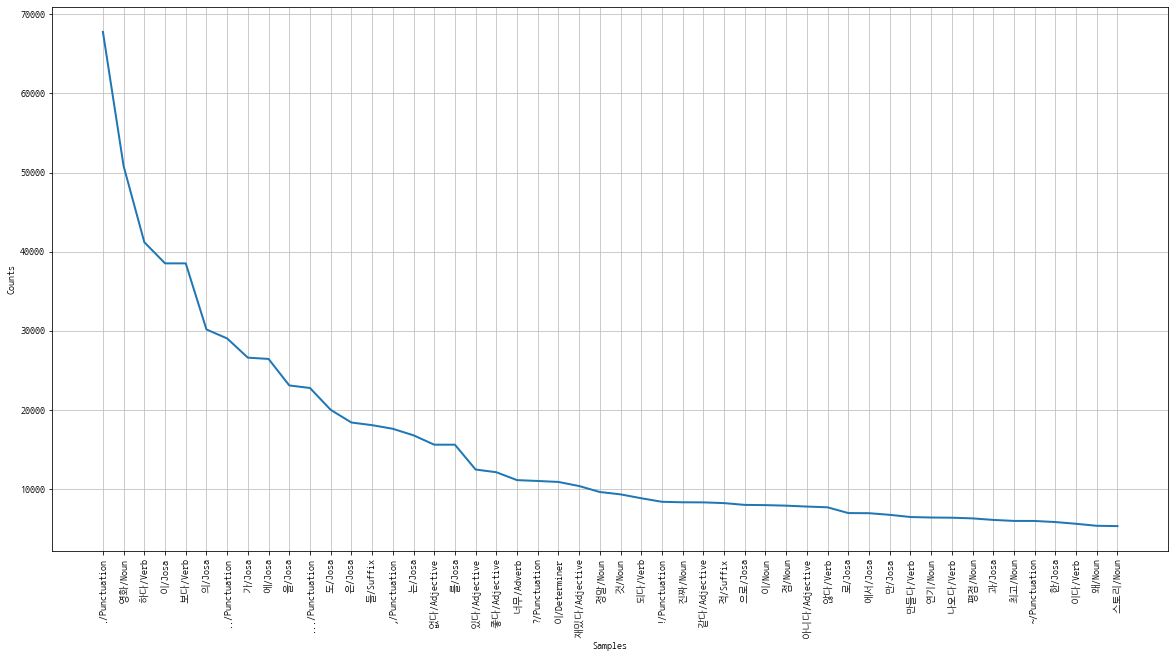

In [68]:
plt.figure(figsize=(20,10))
text.plot(50)

In [14]:
selected_words = [f[0] for f in text.vocab().most_common(10000)]

In [70]:
selected_words

['./Punctuation',
 '영화/Noun',
 '하다/Verb',
 '이/Josa',
 '보다/Verb',
 '의/Josa',
 '../Punctuation',
 '가/Josa',
 '에/Josa',
 '을/Josa',
 '.../Punctuation',
 '도/Josa',
 '은/Josa',
 '들/Suffix',
 ',/Punctuation',
 '는/Josa',
 '없다/Adjective',
 '를/Josa',
 '있다/Adjective',
 '좋다/Adjective',
 '너무/Adverb',
 '?/Punctuation',
 '이/Determiner',
 '재밌다/Adjective',
 '정말/Noun',
 '것/Noun',
 '되다/Verb',
 '!/Punctuation',
 '진짜/Noun',
 '같다/Adjective',
 '적/Suffix',
 '으로/Josa',
 '이/Noun',
 '점/Noun',
 '아니다/Adjective',
 '않다/Verb',
 '로/Josa',
 '에서/Josa',
 '만/Josa',
 '만들다/Verb',
 '연기/Noun',
 '나오다/Verb',
 '평점/Noun',
 '과/Josa',
 '최고/Noun',
 '~/Punctuation',
 '한/Josa',
 '이다/Verb',
 '왜/Noun',
 '스토리/Noun',
 '생각/Noun',
 '..../Punctuation',
 '인/Josa',
 '드라마/Noun',
 '다/Adverb',
 '다/Josa',
 '이다/Josa',
 '감동/Noun',
 '사람/Noun',
 '1/Number',
 'ㅋㅋㅋ/KoreanParticle',
 '보고/Noun',
 '말/Noun',
 '이렇다/Adjective',
 '아깝다/Adjective',
 '더/Noun',
 '때/Noun',
 'ㅋㅋ/KoreanParticle',
 '내/Noun',
 '배우/Noun',
 '거/Noun',
 '재미있다/Adjective',
 '와/Josa',
 '감독/Nou

In [71]:
def term_frequency(doc):
    return [doc.count(word) for word in selected_words]

In [ ]:
selected_words

In [72]:
train_x = [term_frequency(d) for d, _ in train_docs]
test_x = [term_frequency(d) for d, _ in test_docs]
train_y = [c for _, c in train_docs]
test_y = [c for _, c in test_docs]

In [76]:
np.save('./data/x_학습용.npy', train_x)
np.save('./data/x_검증용.npy', test_x)


np.save('./data/y_학습용.npy', train_y)
np.save('./data/y_검증용.npy', test_y)

In [ ]:
import numpy as np

x_train = np.asarray(train_x).astype('float32')
x_test = np.asarray(test_x).astype('float32')

y_train = np.asarray(train_y).astype('float32')
y_test = np.asarray(test_y).astype('float32')

In [6]:
np.save('./data/x_학습용.npy', x_train)
np.save('./data/x_검증용.npy', x_test)


np.save('./data/y_학습용.npy', y_train)
np.save('./data/y_검증용.npy', y_test)

In [1]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.rcParams['font.family']='NanumGothicCoding'
plt.rcParams['axes.unicode_minus']=False
plt.rcParams['figure.dpi']=200
%matplotlib inline

x_train = np.load('./data/x_학습용.npy')
x_test = np.load('./data/x_검증용.npy')

y_train = np.load('./data/y_학습용.npy')
y_test = np.load('./data/y_검증용.npy')

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss=losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])

model.fit(x_train, y_train, epochs=10, batch_size=512)
model.save('./data/mv_model.h5')

In [3]:
model.save('./data/mv_model.h5')

results = model.evaluate(x_test, y_test)

1563/1563 [==============================] - 2s 1ms/step - loss: 0.4178 - binary_accuracy: 0.8523


In [ ]:
from konlpy.tag import Okt
import nltk
import sys
import pandas as pd
import os
import json
import numpy as np
okt = Okt()
def tokenize(doc):
    # norm은 정규화, stem은 근어로 표시하기를 나타냄
    return ['/'.join(t) for t in okt.pos(doc, norm=True, stem=True)]

if os.path.isfile('./data/train_docs.json'):
    with open('./data/train_docs.json', encoding="utf-8") as f:
        train_docs = json.load(f)
    with open('./data/test_docs.json', encoding="utf-8") as f:
        test_docs = json.load(f)
else:
    train_docs = [(tokenize(row[1]), row[2]) for row in train_data]
    test_docs = [(tokenize(row[1]), row[2]) for row in test_data]
    # JSON 파일로 저장
    with open('./data/train_docs.json', 'w', encoding="utf-8") as make_file:
        json.dump(train_docs, make_file, ensure_ascii=False, indent="\t")
    with open('./data/test_docs.json', 'w', encoding="utf-8") as make_file:
        json.dump(test_docs, make_file, ensure_ascii=False, indent="\t")
tokens = [t for d in train_docs for t in d[0]]
text = nltk.Text(tokens, name='NMSC')
selected_words = [f[0] for f in text.vocab().most_common(10000)]
from keras.models import load_model
model = load_model('./data/mv_model.h5')
def tokenize(doc):
    # norm은 정규화, stem은 근어로 표시하기를 나타냄
    return ['/'.join(t) for t in okt.pos(doc, norm=True, stem=True)]
def term_frequency(doc):
    return [doc.count(word) for word in selected_words]

In [27]:
def predict_pos_neg(review):
    token = tokenize(review)
    tf = term_frequency(token)
    data = np.expand_dims(np.asarray(tf).astype('float32'), axis=0)
    score = float(model.predict(data))
    if(score > 0.5):
#         print("[{}]는 {:.2f}% 확률로 긍정 리뷰이지 않을까 추측해봅니다.^^\n".format(review, score * 100))
        return "[{}]는 {:.2f}% 확률로 긍정 리뷰이지 않을까 추측해봅니다.^^\n".format(review, score * 100)
    else:
        return "[{}]는 {:.2f}% 확률로 부정 리뷰이지 않을까 추측해봅니다.^^;\n".format(review, (1 - score)* 100)
#         print("[{}]는 {:.2f}% 확률로 부정 리뷰이지 않을까 추측해봅니다.^^;\n".format(review, (1 - score) * 100))

In [28]:
predict_pos_neg("올해 최고의 영화! 세 번 넘게 봐도 질리지가 않네요.")
predict_pos_neg("배경 음악이 영화의 분위기랑 너무 안 맞았습니다. 몰입에 방해가 됩니다.")
predict_pos_neg("주연 배우가 신인인데 연기를 진짜 잘 하네요. 몰입감 ㅎㄷㄷ")
predict_pos_neg("믿고 보는 감독이지만 이번에는 아니네요")
predict_pos_neg("주연배우 때문에 봤어요")

'[주연배우 때문에 봤어요]는 89.24% 확률로 부정 리뷰이지 않을까 추측해봅니다.^^;\n'

In [29]:
type(predict_pos_neg("주연배우 때문에 봤어요"))

str

In [36]:
train_docs[1][0]

['흠/Noun',
 '.../Punctuation',
 '포스터/Noun',
 '보고/Noun',
 '초딩/Noun',
 '영화/Noun',
 '줄/Noun',
 '..../Punctuation',
 '오버/Noun',
 '연기/Noun',
 '조차/Josa',
 '가볍다/Adjective',
 '않다/Verb']